**Análisis espacial de los usuarios asignados a la Subred Sur de Salud en Bogotá mediante técnicas de programación**


En el siguiente código, usted encontrará los pasos para realizar un análisis espacial a partir de datos alfanuméricos, se tomará como ejemplo, los datos de los usuarios asignados a la Subred Integral de Servicios de Salud Sur para el mes de enero del año 2025 de la ciudad de Bogotá donde se harán operaciones espaciales entre archivos vector y ráster.


**Paso 1-- Cargar las liberias a utilizar**

In [13]:
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point


**NOTA** 

Si se desea se pueden importar más librerías en el transcurso del código 


**Paso 2-- Cargar los datos de usuarios asignados**

Se importan los datos al código, en este caso los usuarios asignados a la Subred de Servicios de Salud Sur para enero de 2025, asegurando que se tengan las coordenadas disponibles


In [30]:
ruta_usuarios_subred_sur = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\usuarios_asignados_subred_sur_enero_2025.csv'

# Cargar el archivo con los datos
usuarios_subred_sur = pd.read_csv(ruta_usuarios_subred_sur, sep=";")

# Ver las 5 primeras filas
print(usuarios_df.head())




   ID          X         Y  EDAD SEXO ASEGURAMIENTO
0   1 -74.128344  4.568888    50    F   SUBSIDIADO 
1   2 -74.128344  4.568888    19    M   SUBSIDIADO 
2   3 -74.128344  4.568888    23    M   SUBSIDIADO 
3   4 -74.171004  4.591763    34    F   SUBSIDIADO 
4   5 -74.106723  4.496200    25    M   SUBSIDIADO 


**NOTA**

En esta ocasión, las coordenadas (`X` y `Y`) están separadas por comas (`,`) en lugar de puntos (`.`).  
Esto puede generar problemas al procesar los datos en Python, ya que las comas pueden ser interpretadas como texto en lugar de valores numéricos.  

Para evitar errores, se debe especificar en el código que las comas representan decimales y convertir las coordenadas a valores numéricos (`float`), asegurando su correcto procesamiento en los análisis espaciales.  


In [32]:
ruta_usuarios_subred_sur = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\usuarios_asignados_subred_sur_enero_2025.csv'

# Cargar el archivo, especificando el separador y reemplazando comas por puntos en las coordenadas
usuarios_subred_sur = pd.read_csv(ruta_usuarios_subred_sur, sep=";", decimal=",")

# Convertir las coordenadas a tipo numérico
usuarios_subred_sur["X"] = usuarios_df["X"].astype(float)
usuarios_subred_sur["Y"] = usuarios_df["Y"].astype(float)

# Ver las primeras filas
print(usuarios_df.head())

   ID          X         Y  EDAD SEXO ASEGURAMIENTO
0   1 -74.128344  4.568888    50    F   SUBSIDIADO 
1   2 -74.128344  4.568888    19    M   SUBSIDIADO 
2   3 -74.128344  4.568888    23    M   SUBSIDIADO 
3   4 -74.171004  4.591763    34    F   SUBSIDIADO 
4   5 -74.106723  4.496200    25    M   SUBSIDIADO 


**Paso 3--Data frame a un Geo data frame**

Ahora, para visualizar los puntos de los usuarios asignados, se le asigna una columna de geometría a los datos que se subieron. Este paso convierte el DataFrame en un GeoDataFrame, lo que permitirá trabajar con las geometrías de forma eficiente 

In [34]:
# Convertir el DataFrame en un GeoDataFrame
usuarios_subred_sur_geo = gpd.GeoDataFrame(
    usuarios_subred_sur,
    geometry=gpd.points_from_xy(usuarios_subred_sur["X"], usuarios_subred_sur["Y"]),
    crs="EPSG:4326"  
)

# Mostrar las primeras filas con la nueva columna de geometría
print(usuarios_subred_sur_geo.head())


   ID          X         Y  EDAD SEXO ASEGURAMIENTO                   geometry
0   1 -74.128344  4.568888    50    F   SUBSIDIADO   POINT (-74.12834 4.56889)
1   2 -74.128344  4.568888    19    M   SUBSIDIADO   POINT (-74.12834 4.56889)
2   3 -74.128344  4.568888    23    M   SUBSIDIADO   POINT (-74.12834 4.56889)
3   4 -74.171004  4.591763    34    F   SUBSIDIADO     POINT (-74.171 4.59176)
4   5 -74.106723  4.496200    25    M   SUBSIDIADO    POINT (-74.10672 4.4962)


**PASO 4-- Incluir una capa poligonal**

Ya con los puntos con una geometría establecida, se procederá a ubicarlos en un contexto espacial. Para ello, se incluirá una capa poligonal que representa la ciudad de Bogotá dividida por localidades.



    

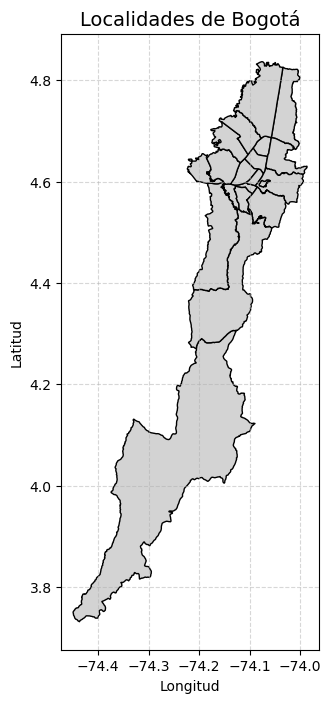

In [49]:
# Cargar la capa poligonal de las localidades de Bogotá
ruta_localidades = "C:/MAESTRIA_EN_GEOMATICA/Programacion_SIG/PROYECTO_FINAL_CODIGO/Analisis_Espacial/Localidades/Loca.shp"
localidades_bogota = gpd.read_file(ruta_localidades)

# Convertir a una proyección adecuada
localidades_bogota = localidades_bogota.to_crs(epsg=4326)  

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar localidades de Bogotá
localidades_bogota.plot(ax=ax, edgecolor='black', facecolor='lightgray', linewidth=1)

# Personalizar el gráfico
ax.set_title("Localidades de Bogotá", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula para referencia

# Mostrar el mapa
plt.show()

**Paso-- 5 Unión espacial de los puntos de usuarios asignados y las localidades de Bogotá** 

En esta sección del código, se procederá a realizar la unión espacial de los puntos correspondientes a los usuarios asignados y las localidades de Bogotá, con el fin de determinar en qué localidad se encuentra cada usuario según sus coordenadas. Para ello, se utilizará la función .sjoin de GeoPandas, que permitirá combinar los datos espaciales de los usuarios con las localidades. Posteriormente, se mostrará un mapa inicial que visualizará la ubicación de los puntos de los usuarios dentro de las localidades correspondientes.

   ID          X         Y  EDAD SEXO ASEGURAMIENTO  \
0   1 -74.128344  4.568888    50    F   SUBSIDIADO    
1   2 -74.128344  4.568888    19    M   SUBSIDIADO    
2   3 -74.128344  4.568888    23    M   SUBSIDIADO    
3   4 -74.171004  4.591763    34    F   SUBSIDIADO    
4   5 -74.106723  4.496200    25    M   SUBSIDIADO    

                    geometry  index_right       LocNombre  \
0  POINT (-74.12834 4.56889)            1      TUNJUELITO   
1  POINT (-74.12834 4.56889)            1      TUNJUELITO   
2  POINT (-74.12834 4.56889)            1      TUNJUELITO   
3    POINT (-74.171 4.59176)           14  CIUDAD BOLIVAR   
4   POINT (-74.10672 4.4962)           13            USME   

            LocAAdmini       LocArea LocCodigo  SHAPE_Leng  SHAPE_Area  
0  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
1  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
2  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
3   Acuerd

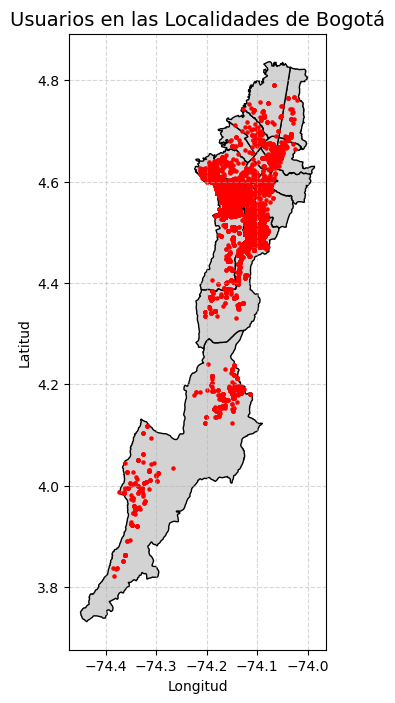

In [63]:
# Realizar la unión espacial entre los puntos de los usuarios y las localidades de Bogotá
usuarios_localidades = gpd.sjoin(usuarios_subred_sur_geo, localidades_bogota, how="inner", predicate="within")

# Ver las primeras filas del resultado para comprobar la unión
print(usuarios_localidades.head())

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar localidades de Bogotá
localidades_bogota.plot(ax=ax, edgecolor='black', facecolor='lightgray', linewidth=1)

# Graficar los puntos de usuarios dentro de las localidades (usuarios_localidades)
usuarios_localidades.plot(ax=ax, color='red', markersize=5)

# Personalizar el gráfico
ax.set_title("Usuarios en las Localidades de Bogotá", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True, linestyle="--", alpha=0.5)

# Mostrar el mapa
plt.show()

**NOTA**

Se guardará el archivo resultante de la unión entre los usuarios asignados en un Geopackage  


In [165]:
# Guardar en formato GeoPackage (más eficiente que Shapefile)
usuarios_localidades.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\usuarios_localidades_union.gpkg', driver="GPKG")




**Paso 6 -- Conteo y filtrado de usuarios en la Subred Sur**

En este paso, se realizará un conteo de los usuarios asignados dentro del territorio de la Subred Sur, es decir, aquellos ubicados en las localidades de Usme, Tunjuelito, Ciudad Bolívar y Sumapaz.

Además, se aplicará un filtro para seleccionar únicamente los usuarios que pertenezcan a estas localidades, asegurando que el análisis se enfoque en la zona de interés.

In [95]:
# Eliminar espacios adicionales en los nombres de las localidades
usuarios_localidades["LocNombre"] = usuarios_localidades["LocNombre"].str.strip()

# Filtrar las localidades de interés (Tunjuelito, Sumapaz, Ciudad Bolívar, Usme)
localidades_interes = ['TUNJUELITO', 'SUMAPAZ', 'CIUDAD BOLIVAR', 'USME']
usuarios_interes = usuarios_localidades[usuarios_localidades["LocNombre"].isin(localidades_interes)]

# Contar cuántos usuarios están en las localidades de interés
usuarios_interes_count = usuarios_interes["LocNombre"].value_counts()

# Contar cuántos usuarios están en las demás localidades
usuarios_otros_count = usuarios_localidades[~usuarios_localidades["LocNombre"].isin(localidades_interes)]["LocNombre"].value_counts()

# Mostrar el total de usuarios en las localidades de interés y en las otras localidades
total_usuarios_interes = usuarios_interes_count.sum()
total_usuarios_otros = usuarios_otros_count.sum()

print(f"Total de usuarios en Tunjuelito, Sumapaz, Ciudad Bolívar y Usme: {total_usuarios_interes}")
print(f"Total de usuarios en otras localidades: {total_usuarios_otros}")

# Mostrar los usuarios en las localidades de interés
print("\nUsuarios por localidad en Tunjuelito, Sumapaz, Ciudad Bolívar y Usme:")
print(usuarios_interes_count.to_string())

# Mostrar los usuarios en las demás localidades
print("\nUsuarios por localidad en otras localidades:")
print(usuarios_otros_count.to_string())



Total de usuarios en Tunjuelito, Sumapaz, Ciudad Bolívar y Usme: 196834
Total de usuarios en otras localidades: 1185

Usuarios por localidad en Tunjuelito, Sumapaz, Ciudad Bolívar y Usme:
LocNombre
CIUDAD BOLIVAR    106604
USME               63811
TUNJUELITO         25919
SUMAPAZ              500

Usuarios por localidad en otras localidades:
LocNombre
BOSA                  190
KENNEDY               133
SAN CRISTOBAL         112
CHAPINERO             105
RAFAEL URIBE URIBE    103
TEUSAQUILLO            78
PUENTE ARANDA          76
BARRIOS UNIDOS         71
USAQUEN                63
ENGATIVA               59
FONTIBON               54
SUBA                   49
SANTA FE               42
LOS MARTIRES           26
ANTONIO NARIÑO         16
CANDELARIA              8


**NOTA**

Hasta este punto, se ha mostrado la ubicación de los usuarios asignados para el mes de enero de 2025 en la Subred Sur, según los datos georreferenciados tanto del régimen subsidiado como contributivo. Sin embargo, es necesario verificar si existen datos vacíos o registros sin coordenadas. Esto permitirá continuar con la construcción del código y realizar más operaciones espaciales con datos vectoriales.

**PASO 7-- Encontrar datos vacios , es decir sin coordenadas y elaborar un diagnóstico de los datos**



In [112]:
# Verificar si hay valores nulos o vacíos en las columnas de coordenadas o si son 0
coordenadas_invalidas = usuarios_subred_sur[(usuarios_subred_sur['X'].isnull()) | 
                                             (usuarios_subred_sur['Y'].isnull()) | 
                                             (usuarios_subred_sur['X'] == 0) | 
                                             (usuarios_subred_sur['Y'] == 0)]

# Contar cuántos registros tienen coordenadas inválidas (vacíos, nulos o con valor 0)
cantidad_invalidas = coordenadas_invalidas.shape[0]

# Mostrar el resultado
if cantidad_invalidas > 0:
    print(f"Cantidad de registros con coordenadas inválidas (vacías, nulas o con valor 0): {cantidad_invalidas}")
else:
    print("No hay registros con coordenadas inválidas (vacías, nulas o con valor 0).")


Cantidad de registros con coordenadas inválidas (vacías, nulas o con valor 0): 20722


In [114]:
from tabulate import tabulate

# Contar usuarios en la Subred Sur (Tunjuelito, Sumapaz, Ciudad Bolívar, Usme)
localidades_interes = ['TUNJUELITO', 'SUMAPAZ', 'CIUDAD BOLIVAR', 'USME']
usuarios_subred_sur_count = usuarios_localidades[usuarios_localidades['LocNombre'].isin(localidades_interes)].shape[0]

# Contar usuarios en otras localidades
usuarios_otros_count = usuarios_localidades[~usuarios_localidades['LocNombre'].isin(localidades_interes)].shape[0]

# Contar usuarios con coordenadas inválidas (vacías, nulas o con valor 0)
usuarios_invalidos_count = usuarios_subred_sur[(usuarios_subred_sur['X'].isnull()) | 
                                                (usuarios_subred_sur['Y'].isnull()) | 
                                                (usuarios_subred_sur['X'] == 0) | 
                                                (usuarios_subred_sur['Y'] == 0)].shape[0]

# Calcular el total general
total_general = usuarios_subred_sur_count + usuarios_otros_count + usuarios_invalidos_count

# Crear la tabla con los resultados
tabla_resumen = [
    ['Usuarios Subred Sur', usuarios_subred_sur_count],
    ['Usuarios en otras localidades', usuarios_otros_count],
    ['Usuarios sin dato (coordenadas inválidas)', usuarios_invalidos_count],
    ['Total General', total_general]
]

# Imprimir la tabla con rayas
print(tabulate(tabla_resumen, headers=['Categoría', 'Cantidad'], tablefmt='grid'))


+-------------------------------------------+------------+
| Categoría                                 |   Cantidad |
+===========================================+============+
| Usuarios Subred Sur                       |     196834 |
+-------------------------------------------+------------+
| Usuarios en otras localidades             |       1185 |
+-------------------------------------------+------------+
| Usuarios sin dato (coordenadas inválidas) |      20722 |
+-------------------------------------------+------------+
| Total General                             |     218741 |
+-------------------------------------------+------------+


**DIAGNOSTICO GENERAL USUARIOS ASIGNADOS ENERO 2025 SUBRED SUR**

Según la tabla anterior, se pueden visualizar los resultados de las operaciones espaciales realizadas entre los datos de los usuarios asignados a la Subred Sur y las localidades de la ciudad de Bogotá, utilizando las coordenadas suministradas.

En enero, se registraron 218,741 usuarios. De estos:

89.98% (196,834 usuarios) están ubicados dentro del territorio de la Subred Sur.
0.54% (1,185 usuarios) se encuentran en otras localidades de Bogotá.
9.47% (20,722 usuarios) no poseen coordenadas.

En total, 10.20% (21,907 usuarios) presentan algún problema en la asignación de puntos, lo que puede deberse a la falta de información sobre la dirección o el lugar de residencia de la persona, o a errores en el registro de la dirección.   


**Paso 8-- Localidades de la Subred Sur con los usuarios identificados en el territorio correspondiente**



   ID          X         Y  EDAD SEXO ASEGURAMIENTO  \
0   1 -74.128344  4.568888    50    F   SUBSIDIADO    
1   2 -74.128344  4.568888    19    M   SUBSIDIADO    
2   3 -74.128344  4.568888    23    M   SUBSIDIADO    
3   4 -74.171004  4.591763    34    F   SUBSIDIADO    
4   5 -74.106723  4.496200    25    M   SUBSIDIADO    

                    geometry  index_right       LocNombre  \
0  POINT (-74.12834 4.56889)            1      TUNJUELITO   
1  POINT (-74.12834 4.56889)            1      TUNJUELITO   
2  POINT (-74.12834 4.56889)            1      TUNJUELITO   
3    POINT (-74.171 4.59176)           14  CIUDAD BOLIVAR   
4   POINT (-74.10672 4.4962)           13            USME   

            LocAAdmini       LocArea LocCodigo  SHAPE_Leng  SHAPE_Area  
0  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
1  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
2  Acuerdo 117 de 2003  9.910940e+06        06    0.210542    0.000807  
3   Acuerd

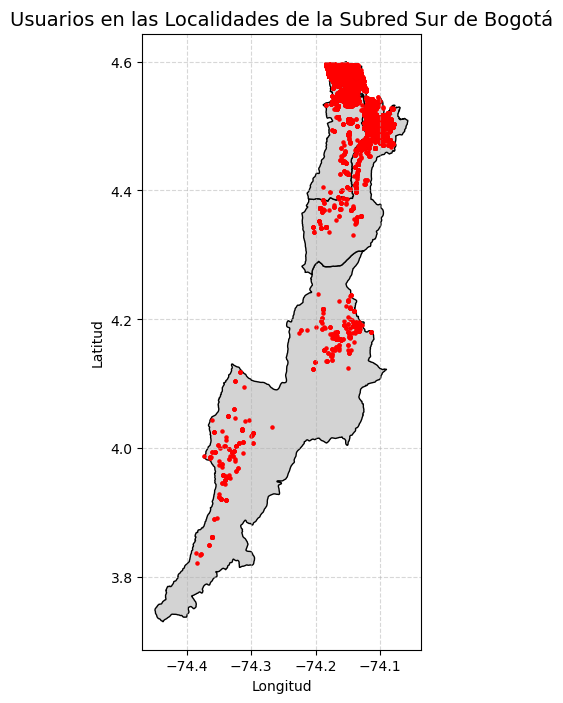

In [162]:
# Cargar el archivo de los usuarios asignados a la Subred Sur
ruta_usuarios_subred_sur = r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\usuarios_asignados_subred_sur_enero_2025.csv'

# Cargar el archivo, especificando el separador y reemplazando comas por puntos en las coordenadas
usuarios_df = pd.read_csv(ruta_usuarios_subred_sur, sep=";", decimal=",")

# Convertir las coordenadas a tipo numérico
usuarios_df["X"] = usuarios_df["X"].astype(float)
usuarios_df["Y"] = usuarios_df["Y"].astype(float)

# Convertir el DataFrame en un GeoDataFrame
usuarios_subred_sur_geo = gpd.GeoDataFrame(
    usuarios_df,
    geometry=gpd.points_from_xy(usuarios_df["X"], usuarios_df["Y"]),
    crs="EPSG:4326"
)

# 2. Cargar la capa poligonal de las localidades de Bogotá
ruta_localidades = "C:/MAESTRIA_EN_GEOMATICA/Programacion_SIG/PROYECTO_FINAL_CODIGO/Analisis_Espacial/Localidades/Loca.shp"
localidades_bogota = gpd.read_file(ruta_localidades)

# Convertir a una proyección adecuada
localidades_bogota = localidades_bogota.to_crs(epsg=4326)

# Filtrar las localidades de interés (Tunjuelito, Sumapaz, Ciudad Bolívar, Usme)
localidades_interes = ['TUNJUELITO', 'SUMAPAZ', 'CIUDAD BOLIVAR', 'USME']
localidades_interes_geo = localidades_bogota[localidades_bogota["LocNombre"].isin(localidades_interes)]

# Realizar la intersección espacial (clip) entre los usuarios y las localidades de la Subred Sur
usuarios_interes_clip = gpd.sjoin(usuarios_subred_sur_geo, localidades_interes_geo, how="inner", predicate="within")

# Ver el resultado
print(usuarios_interes_clip.head())

# Guardar el resultado 
usuarios_interes_clip.to_file(r'C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\usuarios_interes_clip.gpkg', driver="GPKG")

#  Crear la visualización
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar las localidades de la Subred Sur
localidades_interes_geo.plot(ax=ax, edgecolor='black', facecolor='lightgray', linewidth=1)

# Graficar los puntos de usuarios dentro de las localidades de la Subred Sur 
usuarios_interes_clip.plot(ax=ax, color='red', markersize=5)

# Personalizar el gráfico
ax.set_title("Usuarios en las Localidades de la Subred Sur de Bogotá", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True, linestyle="--", alpha=0.5)

# Mostrar el mapa
plt.show()

**Paso 9-- Incluir las unidades de salud disponibles de la Subred Sur** 

Para realizar el análisis de distancia y asignación de los usuarios de la Subred Sur dentro de las cuatro localidades que conforman el territorio, es fundamental considerar las unidades de salud administradas por la entidad. Esto permitirá determinar una distribución adecuada, alineada con la capacidad instalada y el modelo de atención en salud de la ciudad.

In [22]:
# Ruta del archivo CSV
ruta_unidades_salud_Subredsur = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\Analisis_Espacial\UNIDADES_SALUD.csv"

# Cargar el archivo y cambiar comas por puntos en los valores numéricos
unidades_salud_df = pd.read_csv(ruta_unidades_salud_Subredsur, sep=";", decimal=",")

# Convertir a GeoDataFrame
unidades_salud_df["geometry"] = unidades_salud_df.apply(lambda row: Point(row["X"], row["Y"]), axis=1)
unidades_salud_gdf = gpd.GeoDataFrame(unidades_salud_df, geometry="geometry", crs="EPSG:4326")  # CRS original

# Reproyectar a EPSG:3395 (Mercator)
unidades_salud_gdf = unidades_salud_gdf.to_crs(epsg=3395)

# Verificar las primeras filas
print(unidades_salud_gdf.head())

# Guardar en un archivo GeoPackage 
unidades_salud_gdf.to_file("unidades_salud_subredsur.gpkg", driver="GPKG")




   FID Shape *  ID                     NOMBRE_DE  \
0    0   Point   1                         TUNAL   
1    1   Point   2                       MEISSEN   
2    2   Point   3  EL CARMEN - MATERNO INFANTIL   
3    3   Point   5                    SAN BENITO   
4    4   Point   8             MANUELA BELTRÁN I   

                          NOMBRE_ACT               TIPOLOGIA  \
0                  HOSPITAL EL TUNAL                HOSPITAL   
1                   HOSPITAL MEISSEN                HOSPITAL   
2  CENTRO DE SALUD EL CARMEN MATERNO  CENTRO DE SALUD TIPO 2   
3         CENTRO DE SALUD SAN BENITO  CENTRO DE SALUD TIPO 2   
4    CENTRO DE SALUD MANUELA BELTRAN  CENTRO DE SALUD TIPO 1   

                   DIRECCION       LOCALIDAD  NOMBRE_UPZ  UPZ          X  \
0           KR 20 47B 35 SUR      TUNJUELITO     VENECIA   42 -74.128232   
1  Cra. 60G No. 18A - 09 Sur  CIUDAD BOLÍVAR      LUCERO   67 -74.138703   
2    CL 48 B SUR No. 28 - 80      TUNJUELITO     VENECIA   42 -74.131871  

**Se visualiza en el las 4 localidades de la Subred Sur**

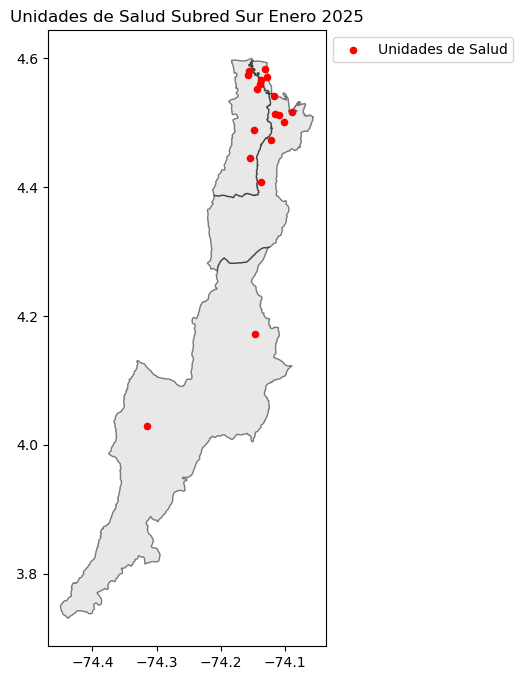

Mapa guardado en: C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\results\mapa_localidades_unidades.png


In [43]:
unidades_salud_gdf = unidades_salud_gdf.to_crs(localidades_subred_sur.crs)
import os

# Crear la carpeta "results" donde se albergaran los productos generados 
output_folder = r"C:\MAESTRIA_EN_GEOMATICA\Programacion_SIG\PROYECTO_FINAL_CODIGO\results"
os.makedirs(output_folder, exist_ok=True)

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(10, 8))

localidades_subred_sur.plot(ax=ax, edgecolor='black', facecolor='lightgray', linewidth=1, alpha=0.5)
unidades_salud_gdf.plot(ax=ax, color='red', markersize=20, marker="o", label="Unidades de Salud")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Ajustar la leyenda
plt.title("Unidades de Salud Subred Sur Enero 2025")

# Guardar el mapa como imagen
output_path = os.path.join(output_folder, "mapa_localidades_unidades.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")  # Guardar con alta calidad

plt.show()

print(f"Mapa guardado en: {output_path}")


